Data Release Page: 

https://gin.g-node.org/paolo_papale/TVSD/src/master

Data Relase Paper:

Papale, P. et al. (2025) “An extensive dataset of spiking activity to reveal the syntax of the ventral stream,” Neuron, 113(4), pp. 539-553.e5. Available at: https://doi.org/10.1016/j.neuron.2024.12.003.


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# please config the paths
normalizedDataPath = '/home/fye/Documents/01_Learning/BrainAICourse/0_Datasets_intro/TVSD'
things_path = "/mnt/nfs/shared_data/8_open_source_data/cv_data/THINGS/images/"
MONKEY_IDs = ['monkeyF', 'monkeyN']

# Load Data

In [5]:
# take one monkey as example
monkey_id = MONKEY_IDs[0]

# load neural data
train_norm_data = np.load(os.path.join(normalizedDataPath, f'{monkey_id}_train_MUA.npy'))
test_norm_data = np.load(os.path.join(normalizedDataPath, f'{monkey_id}_test_MUA.npy'))
test_norm_data_reps = np.load(os.path.join(normalizedDataPath, f'{monkey_id}_test_MUA_reps.npy'))

print('train normalize data shape (num_img, num_neuron): ', train_norm_data.shape)
print('test normalize data shape (num_img, num_neuron): ', test_norm_data.shape)
print('test normalize data (repetition reserved) shape (num_reps, num_img, num_neuron): ', test_norm_data_reps.shape)

train normalize data shape (num_img, num_neuron):  (22248, 1024)
test normalize data shape (num_img, num_neuron):  (100, 1024)
test normalize data (repetition reserved) shape (num_reps, num_img, num_neuron):  (30, 100, 1024)


In [ ]:
# load unit table which contains unit information for each neuron
unit_table = pd.read_csv(os.path.join(normalizedDataPath, f'unit_table_{monkey_id}.csv'))
unit_table

,unit_id,array_id,region,mean_SNR,mean_latency,mean_reliability,oracle_correlation
0,0,0,V1,3.424278,18.75,0.209574,0.428947
1,1,0,V1,3.726187,19.50,0.223850,0.433227
2,2,0,V1,5.887569,18.75,0.575567,0.749390
3,3,0,V1,4.877667,17.75,0.398740,0.616069
4,4,0,V1,4.155510,16.25,0.204876,0.419431
...,...,...,...,...,...,...,...
1019,1019,15,V4,4.069612,31.00,0.823487,0.904077
1020,1020,15,V4,3.877016,30.50,0.844101,0.915828
1021,1021,15,V4,3.590074,31.25,0.833096,0.909606
1022,1022,15,V4,4.344573,39.75,0.775076,0.876014


In [4]:
# load stimlus table which contains stimulus information for each image
train_stim_table = pd.read_csv(os.path.join(normalizedDataPath, 'train_table_normalizedData.csv'))
test_stim_table = pd.read_csv(os.path.join(normalizedDataPath, 'test_table_normalizedData.csv'))
train_stim_table

,stimulus_id,category,stimulus_name
0,0,aardvark,aardvark_01b.jpg
1,1,aardvark,aardvark_02s.jpg
2,2,aardvark,aardvark_03s.jpg
3,3,aardvark,aardvark_04s.jpg
4,4,aardvark,aardvark_05s.jpg
...,...,...,...
22243,22243,zucchini,zucchini_08n.jpg
22244,22244,zucchini,zucchini_09s.jpg
22245,22245,zucchini,zucchini_10s.jpg
22246,22246,zucchini,zucchini_11s.jpg


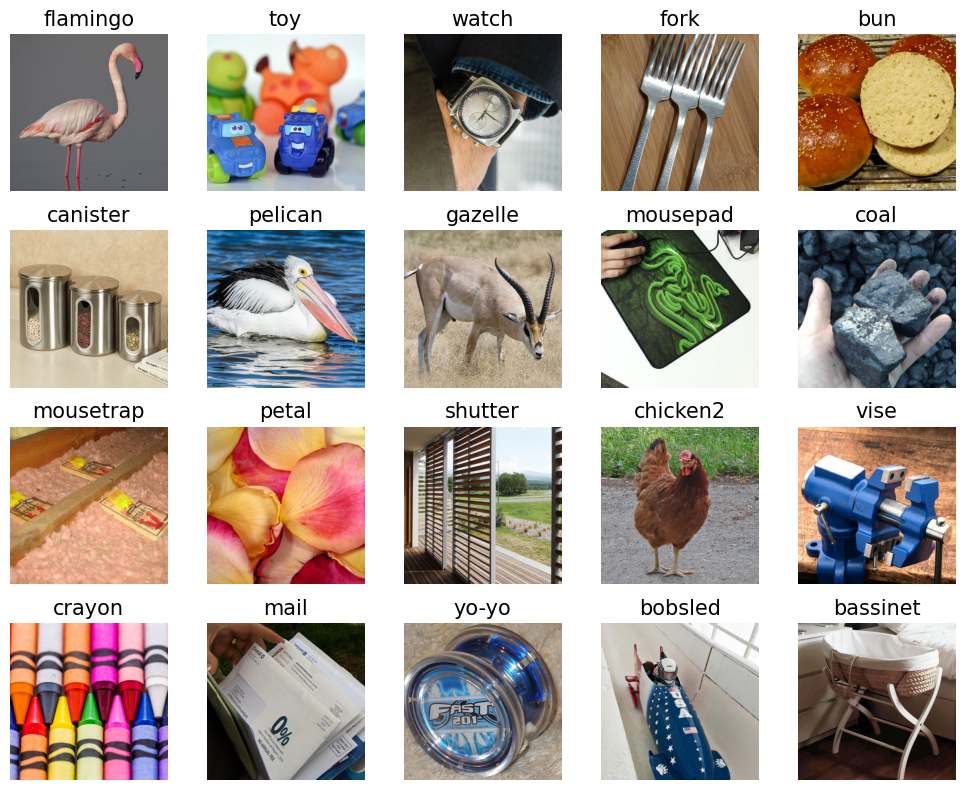

In [20]:
# show some stimulus
n_cols = 5; n_rows = 4
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))

for i in range(n_rows):
    for j in range(n_cols):
        ax = axs[i, j]
        img_id = np.random.randint(0, len(stim_table))
        img = plt.imread(os.path.join(things_path, stim_table.iloc[img_id]['category'], stim_table.iloc[img_id]['filename']))
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f'{stim_table.iloc[img_id]["category"]}', fontsize=15)

plt.tight_layout()

# Some basic analysis

In [6]:
it_idx = unit_table[unit_table['region'] == 'V4'].unit_id.values
rdm = - np.corrcoef(train_norm_data[:, it_idx], rowvar=True)

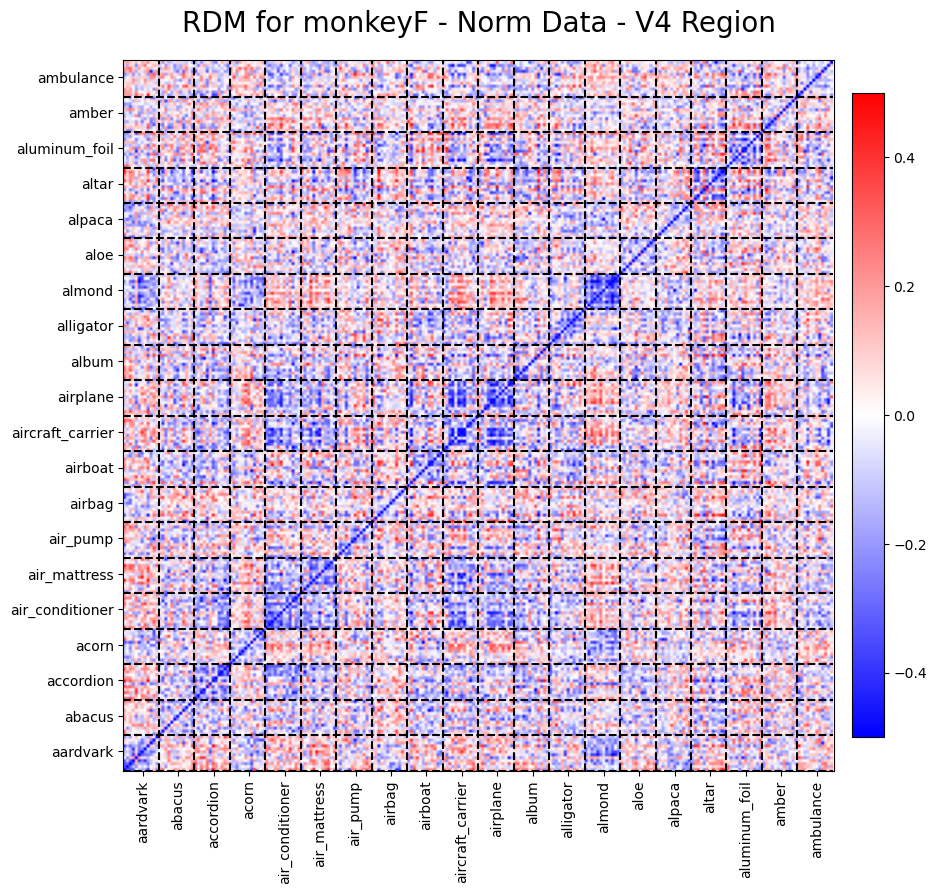

In [7]:
plt.figure(figsize=(10, 10))
plt.imshow(rdm[:240, :240], cmap='bwr', vmin=-0.5, vmax=0.5, origin='lower')

tmp_cat = train_stim_table['category'].values[:240]
cat_bondaries = np.where(np.array(tmp_cat[1:]) != np.array(tmp_cat[:-1]))[0] + 1
cat_bondaries = np.concatenate(([0], cat_bondaries))
plt.xticks(cat_bondaries + 6, tmp_cat[cat_bondaries], rotation=90, fontsize=10)
plt.yticks(cat_bondaries + 6, tmp_cat[cat_bondaries], fontsize=10)
plt.hlines(cat_bondaries - 0.5, *plt.xlim(), colors='k', linestyles='dashed')
plt.vlines(cat_bondaries - 0.5, *plt.ylim(), colors='k', linestyles='dashed')
plt.xlim(-0.5, 240)
plt.ylim(-0.5, 240)
cbar = plt.colorbar(shrink=0.7, pad=0.02)
plt.title(f'RDM for {monkey_id} - Norm Data - V4 Region', fontsize=20, pad=20)
plt.tight_layout()
plt.show()

# Optional Temporal Data

Temporal data is very large, about 58G for each monkey. Be sure that you have enough disk space to store it.

Also, make sure that you have enough RAM to load data or you may want to use memory mapping (`np.memmap`).

In [8]:
tvsd_path = '/shared_data/8_open_source_data/TVSD/'

In [ ]:
# it takes about 1.5 min to load data
v1_data = np.load(os.path.join(tvsd_path, f'{monkey_id}/mua_v1.npy')) # 28G
v4_data = np.load(os.path.join(tvsd_path, f'{monkey_id}/mua_v4.npy')) # 10G
it_data = np.load(os.path.join(tvsd_path, f'{monkey_id}/mua_it.npy')) # 18G
tb = np.load(os.path.join(tvsd_path, f'{monkey_id}/tb.npy')) # timebins
stim_table = pd.read_csv(os.path.join(tvsd_path, f'{monkey_id}/{monkey_id}_stim_table.csv'))

In [21]:
import scipy.sparse as sp
def save_sparse_matrix(matrix, output_path):
    if matrix.ndim == 2:
        # If the matrix is already 2D, we can directly convert it to a sparse matrix
        sparse_matrix = sp.csc_matrix(matrix)
    else:
        matrix_2d = matrix.reshape(matrix.shape[0], -1)
        sparse_matrix = sp.csc_matrix(matrix_2d)    
    np.savez(output_path, mat = sparse_matrix, mat_shape = matrix.shape)

def load_sparse_matrix(filename):
    """
    load npz files with sparse matrix and dimension
    output dense matrix with the correct dim
    """
    npzfile = np.load(filename, allow_pickle=True) 
    sparse_matrix = npzfile['mat'][()]
    ndim = npzfile['mat_shape'][()]

    if len(ndim) == 2:
        # If the matrix is already 2D, we can directly convert it to a dense matrix
        new_matrix_2d = sparse_matrix.todense()
    else:
        new_matrix_2d = np.array(sparse_matrix.todense())
        new_matrix = new_matrix_2d.reshape(ndim)
    return new_matrix

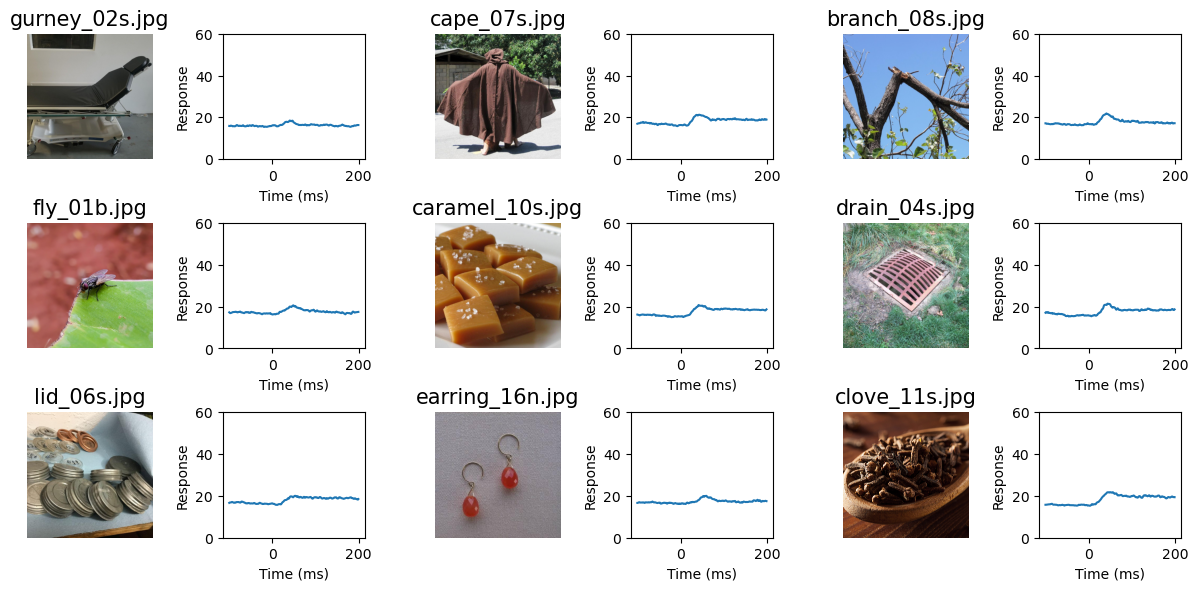

In [17]:
n_cols = 6; n_rows = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))

for i in range(n_rows):
    for j in range(n_cols // 2):
        ax = axes[i, j * 2]
        img_id = i * n_cols // 2 + j + 50
        img = plt.imread(os.path.join(things_path, stim_table.iloc[img_id]['category'], stim_table.iloc[img_id]['filename']))
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f'{stim_table.iloc[img_id]["filename"]}', fontsize=15)
        
        ax = axes[i, j * 2 + 1]
        ax.plot(tb, v1_data[:, img_id, :].mean(axis = 0))
        ax.set_ylim([0,60])
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('Response')
plt.tight_layout()

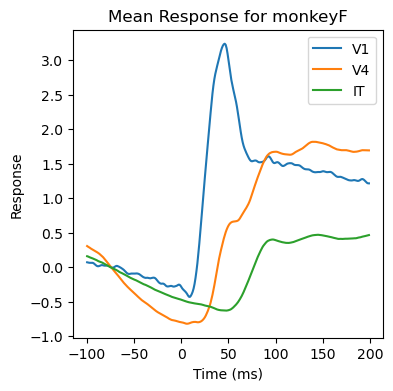

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.plot(tb, v1_data.mean(axis=(0,1)) - v1_data[:,:,:50].mean(axis = (0,1,2)), label='V1')
ax.plot(tb, v4_data.mean(axis=(0,1)) - v4_data[:,:,:50].mean(axis = (0,1,2)), label='V4')
ax.plot(tb, it_data.mean(axis=(0,1)) - it_data[:,:,:50].mean(axis = (0,1,2)), label='IT')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Response')
ax.set_title(f'Mean Response for {monkey_id}')
ax.legend()
plt.show()